# **Model Evaluation and Selection**
<hr>

Basically when we are going to build our model, we have to try a lot of algorithsm and choose the model with best metrics, always guaraating low bias and low variance.

### **What are Low/High Bias/Variance in Machine Learning?**
<hr>

- **Low Bias** is when your model predictions are very close to the real values.
- **High Bias** is when your model predictions are far from the real values.
- **Low Variance:** when you run your model several times, the different predictions of your observation points won’t vary much.
- **High Variance:** when you run your model several times, the different predictions of your observation points will vary a lot.

**What you want to get when you build a model is: Low Bias and Low Variance.**

### **Metrics to evaluate regression models**
<hr>

#### **1) R-Square /Adjusted R-Square**

$$
R^2 = 1 - \frac{SS_{Regression}}{SS_{Total}} = 1 - \frac{\sum_{i}(y_i-\hat{y_i})^2}{\sum_{i}(y_i-\bar{y})^2}
$$

R Square measures how much variability in dependent variable can be explained by the model. In other words, **how close the data are to the fitted regression line**. It can be **between 0 to 1** and a **bigger value indicates a better fit** between prediction and actual value.

However, it **does not take into consideration of overfitting problem**. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will **penalize additional independent variables** added to the model and **adjust the metric to prevent overfitting issues**, different of normal R-Squared where never decreases, it's always increasing or constant.

$$
R_{adjusted}^2 = 1 - \left[\frac{(1 - R^2)(n-1)}{n-k-1}\right]
$$

- **n** is the number of points in your data sample
- **k** is the number od independent regressors, i.e the number of variables in your model, excluding the constant.

If Adjusted R-Square is roughly the same as R-Square, meaning the model is quite robust.

#### **2) Mean Square Error(MSE)/Root Mean Square Error(RMSE)**

$$
MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y_i})^2
$$

While R-Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an **absolute measure of the goodness for the fit**. You cannot interpret many insights from one single result but it gives you a real number to compare against other model results and help you select the best regression model.

Root Mean Square Error (RMSE) is the square root of MSE. It is **used more commonly** than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus **square root brings it back to the same level of prediction error and makes it easier for interpretation**.

$$
RMSE = \sqrt{MSE}
$$

#### **3) Mean Absolute Error(MAE)**

$$
MAE = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y_i}|
$$

Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). Compare to MSE or RMSE, MAE is a **more direct representation of sum of error terms**. **MSE gives larger penalization to big prediction error by square it** while MAE treats all errors the same.

#### **Overall Recommendation**

R-Square/Adjusted R-Square is better used to explain the model to other people because you can explain the number as a percentage of the output variability. MSE, RMSE, or MAE are better be used to compare performance between different regression models, mainly the RMSE metric. 

**REFERENCE:**

https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

### **Basic Model Selection**
<hr>

The main idea is to apply the same data to several models and choose the model that has the best metrics and work on it.

#### **Basic pre-processing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Data.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


<AxesSubplot:>

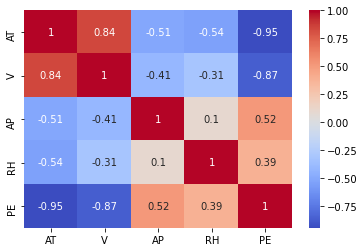

In [5]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [6]:
X = df.iloc[:, :-1].values
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [7]:
y = df.iloc[:, -1:].values
print(y)

[[463.26]
 [444.37]
 [488.56]
 ...
 [429.57]
 [435.74]
 [453.28]]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

#### **Function to calculate the most used regression metrics**

In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

def metrics(y_true, y_pred, X, y):
    r_s = r2_score(y_true, y_pred)
    adjusted_r_s = 1 - ((1-r_s)*(len(y)-1)/(len(y)-X.shape[1]-1))
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"R-Squared: {r_s:.3f} | Adjusted R-Squared: {adjusted_r_s:.3f}"\
          f" | MSE: {mse:.3f} | RMSE: {rmse:.3f} | MAE: {mae:.3f}")
    

#### **Trying several regression models**

##### **Linear Regression**

In [10]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

metrics(y_test, y_pred, X_train, y_train)

R-Squared: 0.933 | Adjusted R-Squared: 0.932 | MSE: 19.734 | RMSE: 4.442 | MAE: 3.567


##### **Polynomial Regression**

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)

linear_regressor = LinearRegression()
linear_regressor.fit(X_poly, y_train)

y_pred = linear_regressor.predict(poly_reg.fit_transform(X_test))

metrics(y_test, y_pred, X_train, y_train)

R-Squared: 0.946 | Adjusted R-Squared: 0.946 | MSE: 15.847 | RMSE: 3.981 | MAE: 3.136


##### **Decision Tree Regression**

In [12]:
from sklearn.tree import DecisionTreeRegressor

dtr_regressor = DecisionTreeRegressor(random_state=0)
dtr_regressor.fit(X_train, y_train)

y_pred = dtr_regressor.predict(X_test)

metrics(y_test, y_pred, X_train, y_train)

R-Squared: 0.923 | Adjusted R-Squared: 0.923 | MSE: 22.549 | RMSE: 4.749 | MAE: 3.104


##### **Random Forest Regression**

In [13]:
from sklearn.ensemble import RandomForestRegressor

rfr_regressor = RandomForestRegressor(n_estimators=64, random_state=0)
rfr_regressor.fit(X_train, y_train.reshape(len(y_train), ))

y_pred = rfr_regressor.predict(X_test)
metrics(y_test, y_pred, X_train, y_train)

R-Squared: 0.965 | Adjusted R-Squared: 0.965 | MSE: 10.253 | RMSE: 3.202 | MAE: 2.350


##### **Support Vector Regression**

Applying Feature Scaling before training

In [14]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train_fs = sc_X.fit_transform(X_train)

sc_y = StandardScaler()
y_train_fs = sc_y.fit_transform(y_train)

In [15]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel="rbf")
svr_regressor.fit(X_train_fs, y_train_fs.reshape(len(y_train_fs),))

y_pred = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(X_test)))

metrics(y_test, y_pred, X_train, y_train)

R-Squared: 0.948 | Adjusted R-Squared: 0.948 | MSE: 15.186 | RMSE: 3.897 | MAE: 2.995


---

#### **Conclusion**

The model with the best metrics was **Random Forest Regression** with the below metrics:
R-Squared: 0.965 | Adjusted R-Squared: 0.965 | MSE: 10.253 | RMSE: 3.202 | MAE: 2.350

Based on R-Squared, using Random Forest Regression, 96% of the test data fit well the regression model.